#### NC Statewide Stay at Home Order (Mar 27, 2020)
* https://www.ncdhhs.gov/news/press-releases/governor-cooper-announces-statewide-stay-home-order-until-april-29

### Treatment: 
* NC (population: 10.6) - 3/27/2020

### Control (Stay-At-Home Order Announced After 3/27/2020): 
* VA (population: 8.59) - 3/30/2020

* GA (population:10.71) - 4/3/2020

* SC (population: 5.22) - 4/7/2020

Population Reference (Population data are based on resident population of the U.S. in 2020, by state (in millions))
* https://www.statista.com/statistics/183497/population-in-the-federal-states-of-the-us/

Stay-At-Home Order References
* https://www.usatoday.com/storytelling/coronavirus-reopening-america-map/

In [1]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import datetime
import os
import sys
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# load data for covid cases
daily_cases = pd.read_csv("./data/us-counties-covid-cases.csv")
# treatment - NC
daily_cases_NC = daily_cases[daily_cases["state"] == "North Carolina"]
# control - VA, GA, SC
daily_cases_VA = daily_cases[daily_cases["state"] == "Virginia"]
daily_cases_GA = daily_cases[daily_cases["state"] == "Georgia"]
daily_cases_SC = daily_cases[daily_cases["state"] == "South Carolina"]

<IPython.core.display.Javascript object>

In [3]:
daily_cases_VA.sample(5)

,date,county,state,fips,cases,deaths
456597,2020-08-21,Pittsylvania,Virginia,51143.0,611,4.0
115156,2020-05-04,Roanoke,Virginia,51161.0,57,0.0
936457,2021-01-16,Spotsylvania,Virginia,51177.0,5926,74.0
495306,2020-09-02,Charlotte,Virginia,51037.0,74,0.0
25951,2020-04-01,Rockbridge,Virginia,51163.0,2,0.0


<IPython.core.display.Javascript object>

In [4]:
daily_cases_GA.sample(5)

,date,county,state,fips,cases,deaths
460590,2020-08-23,Ware,Georgia,13299.0,1296,41.0
127677,2020-05-09,Forsyth,Georgia,13117.0,366,10.0
833284,2020-12-16,Jeff Davis,Georgia,13161.0,1085,34.0
12640,2020-03-26,Clinch,Georgia,13065.0,1,0.0
325578,2020-07-12,Rockdale,Georgia,13247.0,700,11.0


<IPython.core.display.Javascript object>

In [5]:
daily_cases_SC.sample(5)

,date,county,state,fips,cases,deaths
42571,2020-04-08,Jasper,South Carolina,45053.0,12,0.0
465717,2020-08-24,Newberry,South Carolina,45071.0,923,13.0
533622,2020-09-14,Lee,South Carolina,45061.0,687,32.0
123531,2020-05-07,Greenwood,South Carolina,45047.0,61,0.0
1098119,2021-03-07,Barnwell,South Carolina,45011.0,2426,50.0


<IPython.core.display.Javascript object>

In [6]:
# load population data
pop =  pd.read_excel("./co-est2019-annres.xlsx",  header=[0,1,2,3])
pop.columns = pop.columns.droplevel([0,1,2])
pop.rename(columns={"Unnamed: 0_level_3": "Geographic Area"}, inplace = True)
pop["Geographic Area"] = pop["Geographic Area"].str.replace('.','', regex=True)

<IPython.core.display.Javascript object>

In [7]:
# subset population data to NC
pop_NC = pop[pop['Geographic Area'].str.contains("North Carolina")]
# use 2019 population
pop_NC = pop_NC.iloc[:, [0] + [-1]]
# rename county column
pop_NC['Geographic Area'] = pop_NC['Geographic Area'].str.replace(' County, North Carolina', '')
# rename dataframe columnes 
pop_NC.columns = ['County', 'population']

# subset population data to VA
pop_VA = pop[pop['Geographic Area'].str.contains(", Virginia")]
pop_VA = pop_VA.iloc[:-1]
# use 2019 population
pop_VA = pop_VA.iloc[:, [0] + [-1]]
# rename county column
pop_VA['Geographic Area'] = pop_VA['Geographic Area'].str.replace(' County, Virginia', '')
pop_VA['Geographic Area'] = pop_VA['Geographic Area'].str.replace(', Virginia', '')
# rename dataframe columnes 
pop_VA.columns = ['County', 'population']

# subset population data to GA 
pop_GA = pop[pop['Geographic Area'].str.contains("Georgia")]
# use 2019 population
pop_GA = pop_GA.iloc[:, [0] + [-1]]
# rename county column
pop_GA['Geographic Area'] = pop_GA['Geographic Area'].str.replace(' County, Georgia', '')
# rename dataframe columnes 
pop_GA.columns = ['County', 'population']

# subset population data to SC
pop_SC = pop[pop['Geographic Area'].str.contains("South Carolina")]
# use 2019 population
pop_SC = pop_SC.iloc[:, [0] + [-1]]
# rename county column
pop_SC['Geographic Area'] = pop_SC['Geographic Area'].str.replace(' County, South Carolina', '')
# rename dataframe columnes 
pop_SC.columns = ['County', 'population']

<IPython.core.display.Javascript object>

In [8]:
# remove uknown counties
daily_cases_NC = daily_cases_NC[daily_cases_NC['county']!='Unknown']
daily_cases_GA = daily_cases_GA[daily_cases_GA['county']!='Unknown']
daily_cases_SC = daily_cases_SC[daily_cases_SC['county']!='Unknown']
daily_cases_VA = daily_cases_VA[daily_cases_VA['county']!='Unknown']

<IPython.core.display.Javascript object>

In [9]:
# make sure counties are matching in COVID cases & population datasets
sorted(pop_NC.County.unique()) == sorted(daily_cases_NC.county.unique())

True

<IPython.core.display.Javascript object>

In [10]:
sorted(pop_GA.County.unique()) == sorted(daily_cases_GA.county.unique())

True

<IPython.core.display.Javascript object>

In [11]:
sorted(pop_SC.County.unique()) == sorted(daily_cases_SC.county.unique())

True

<IPython.core.display.Javascript object>

In [12]:
sorted(pop_VA.County.unique()) == sorted(daily_cases_VA.county.unique())

True

<IPython.core.display.Javascript object>

In [13]:
# set comparison period to be 21 days
numdays = 21

<IPython.core.display.Javascript object>

In [14]:
# retrieve policy date for NC Stay at Home Order
policy_nc = datetime.datetime.strptime('27032020', "%d%m%Y").date()
date_before_nc = [policy_nc - datetime.timedelta(days=x) for x in range(numdays+1)]
date_after_nc = [policy_nc + datetime.timedelta(days=x) for x in range(numdays+1)]
date_list_nc = date_before_nc + date_after_nc

# data cleaning - treatment state: NC
daily_nc = daily_cases_NC.copy()
daily_nc["date"] = pd.to_datetime(daily_nc["date"])
daily_nc_timed = daily_nc.loc[daily_nc["date"].isin(date_list_nc)] # covering a total of 43 days (21 + 21 + 1)

# merge NC population with COVID cases
merged_NC = pd.merge(left=daily_nc_timed, right=pop_NC, how='left', left_on='county', right_on='County')

# drop duplicated NC County column
merged_NC = merged_NC.drop('County', axis=1)
# create NC standardized COVID cases column
merged_NC['cases_standardized'] = merged_NC['cases']/merged_NC['population']*10000

# create indicator variable - pre and post policy annoucement
merged_NC['post_policy'] = (merged_NC.date > '2020-03-27')
merged_NC.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
427,2020-03-26,Union,North Carolina,37179.0,24,0.0,239859.0,1.000588,False
1947,2020-04-14,Cleveland,North Carolina,37045.0,39,0.0,97947.0,3.981745,True
1187,2020-04-05,Scotland,North Carolina,37165.0,2,0.0,34823.0,0.574333,True
1253,2020-04-06,McDowell,North Carolina,37111.0,10,0.0,45756.0,2.185506,True
989,2020-04-03,McDowell,North Carolina,37111.0,8,0.0,45756.0,1.748405,True


<IPython.core.display.Javascript object>

In [15]:
# data cleaning - control state: VA
daily_va = daily_cases_VA.copy()
daily_va["date"] = pd.to_datetime(daily_va["date"])
daily_va_timed = daily_va.loc[daily_va["date"].isin(date_list_nc)]

# merge VA population with COVID cases
merged_VA = pd.merge(left=daily_va_timed, right=pop_VA, how='left', left_on='county', right_on='County')

# drop duplicated VA County column
merged_VA = merged_VA.drop('County', axis=1)
# create VA standardized COVID cases column
merged_VA['cases_standardized'] = merged_VA['cases']/merged_VA['population']*10000

# create indicator variable - pre and post policy annoucement
merged_VA['post_policy'] = (merged_VA.date > '2020-03-27')
merged_VA.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
2296,2020-04-13,Winchester city,Virginia,51840.0,20,0.0,28078.0,7.123014,True
1599,2020-04-08,Clarke,Virginia,51043.0,3,0.0,14619.0,2.052124,True
2086,2020-04-12,Emporia city,Virginia,51595.0,7,0.0,5346.0,13.093902,True
524,2020-03-28,Lee,Virginia,51105.0,2,0.0,23423.0,0.853862,True
1277,2020-04-05,Hampton city,Virginia,51650.0,40,0.0,134510.0,2.973757,True


<IPython.core.display.Javascript object>

In [16]:
# data cleaning - control state: GA
daily_ga = daily_cases_GA.copy()
daily_ga["date"] = pd.to_datetime(daily_ga["date"])
daily_ga_timed = daily_ga.loc[daily_ga["date"].isin(date_list_nc)] 

# merge GA population with COVID cases
merged_GA = pd.merge(left=daily_ga_timed, right=pop_GA, how='left', left_on='county', right_on='County')

# drop duplicated GA County column
merged_GA = merged_GA.drop('County', axis=1)
# create GA standardized COVID cases column
merged_GA['cases_standardized'] = merged_GA['cases']/merged_GA['population']*10000

# create indicator variable - pre and post policy annoucement
merged_GA['post_policy'] = (merged_GA.date > '2020-03-27')
merged_GA.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
1469,2020-04-01,Wilkes,Georgia,13317.0,2,0.0,9777.0,2.045617,True
1894,2020-04-04,Union,Georgia,13291.0,1,0.0,24511.0,0.407980,True
595,2020-03-25,Madison,Georgia,13195.0,2,0.0,29880.0,0.669344,False
3462,2020-04-15,Bacon,Georgia,13005.0,14,0.0,11164.0,12.540308,True
2939,2020-04-11,Oglethorpe,Georgia,13221.0,12,1.0,15259.0,7.864211,True


<IPython.core.display.Javascript object>

In [17]:
# data cleaning - control state: SC
daily_sc = daily_cases_SC.copy()
daily_sc["date"] = pd.to_datetime(daily_sc["date"])
daily_sc_timed = daily_sc.loc[daily_sc["date"].isin(date_list_nc)]

# merge SC population with COVID cases
merged_SC = pd.merge(left=daily_sc_timed, right=pop_SC, how='left', left_on='county', right_on='County')

# drop duplicated SC County column
merged_SC = merged_SC.drop('County', axis=1)
# create SC standardized COVID cases column
merged_SC['cases_standardized'] = merged_SC['cases']/merged_SC['population']*10000

# create indicator variable - pre and post policy annoucement
merged_SC['post_policy'] = (merged_SC.date > '2020-03-27')
merged_SC.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
886,2020-04-08,McCormick,South Carolina,45065.0,2,1.0,9463.0,2.113495,True
918,2020-04-09,Florence,South Carolina,45041.0,53,5.0,138293.0,3.832443,True
906,2020-04-09,Calhoun,South Carolina,45017.0,6,1.0,14553.0,4.122861,True
490,2020-03-30,York,South Carolina,45091.0,43,0.0,280979.0,1.530363,True
233,2020-03-24,Florence,South Carolina,45041.0,5,2.0,138293.0,0.361551,False


<IPython.core.display.Javascript object>

In [18]:
# stack 3 control states
merged_control = merged_VA.append([merged_GA, merged_SC])
merged_control.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
1026,2020-04-11,Oconee,South Carolina,45073.0,13,0.0,79546.0,1.634275,True
116,2020-03-19,James City,Virginia,51095.0,14,2.0,76523.0,1.829515,False
2618,2020-04-09,McIntosh,Georgia,13191.0,3,0.0,14378.0,2.086521,True
2334,2020-04-07,Seminole,Georgia,13253.0,13,0.0,8090.0,16.069221,True
1015,2020-03-29,Long,Georgia,13183.0,1,0.0,19559.0,0.511274,True


<IPython.core.display.Javascript object>

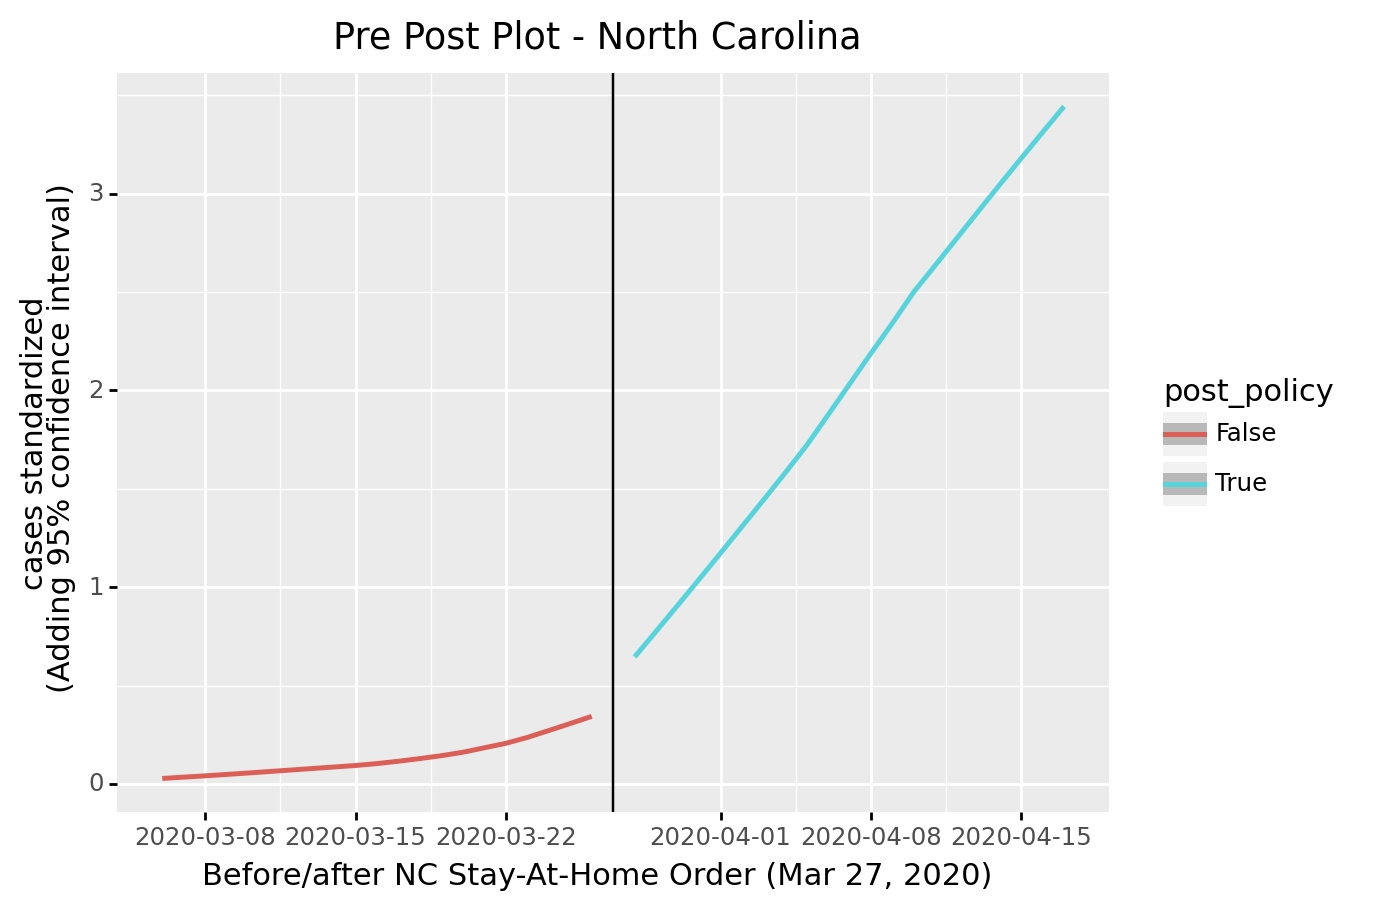

<ggplot: (8778765818811)>

<IPython.core.display.Javascript object>

In [19]:
# pre-post plot - NC
(ggplot() +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)') 
    + ylab(str("cases standardized") + ' \n(Adding 95% confidence interval)')
    + geom_vline(xintercept = '2020-03-27')
    + labs(title=str("Pre Post Plot - North Carolina")))

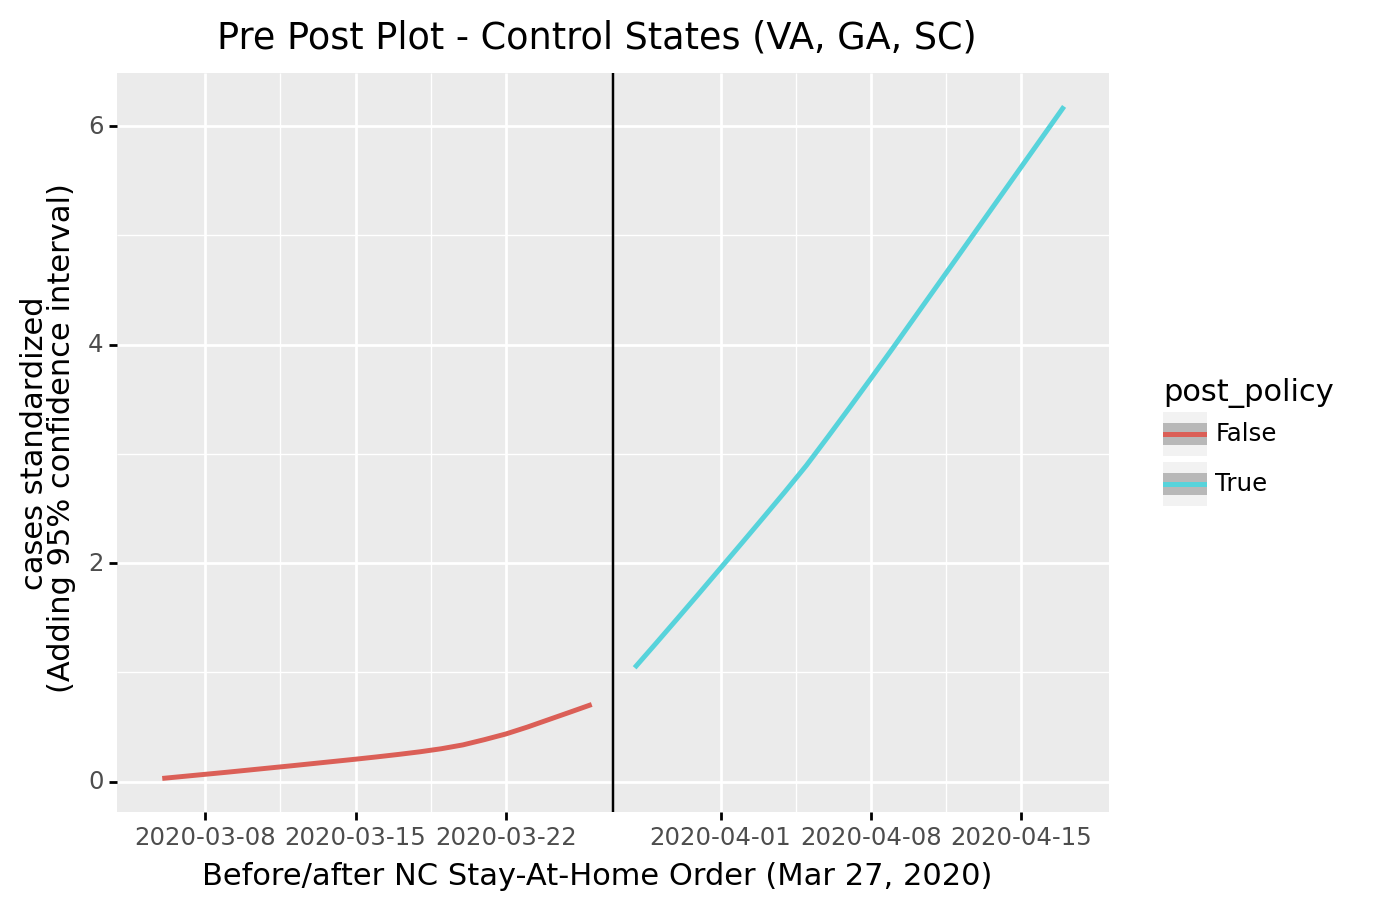

<ggplot: (8778772189121)>

<IPython.core.display.Javascript object>

In [20]:
# pre-post plot - control States (VA, GA, SC)
(ggplot() +
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)') 
    + ylab(str("cases standardized") + ' \n(Adding 95% confidence interval)')
    + geom_vline(xintercept = '2020-03-27')
    + labs(title=str("Pre Post Plot - Control States (VA, GA, SC)")))

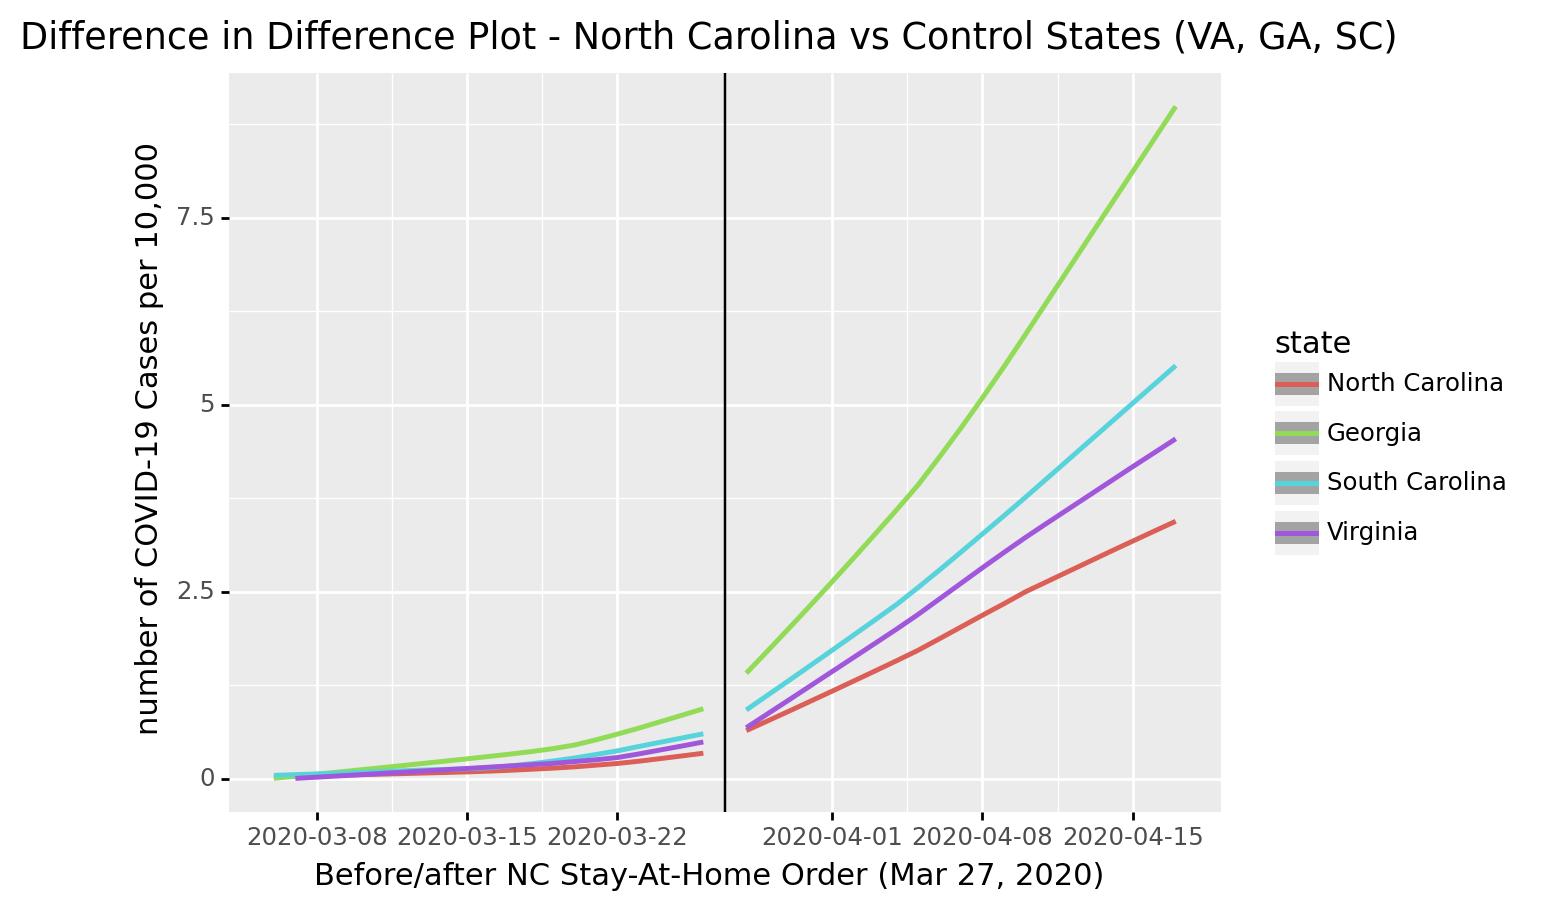

<ggplot: (8778772189778)>

<IPython.core.display.Javascript object>

In [21]:
# diff-in-diff plot - NC vs control States
(ggplot() +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
        
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess')
    + geom_vline(xintercept = '2020-03-27')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)')
    + ylab(str("number of COVID-19 Cases per 10,000"))
    + labs(title=str("Difference in Difference Plot - North Carolina vs Control States (VA, GA, SC)")))

In [22]:
# create indicator variable for treatment and control state
merged_NC['State'] = "North Carolina"
merged_control['State'] = "Control States"

<IPython.core.display.Javascript object>

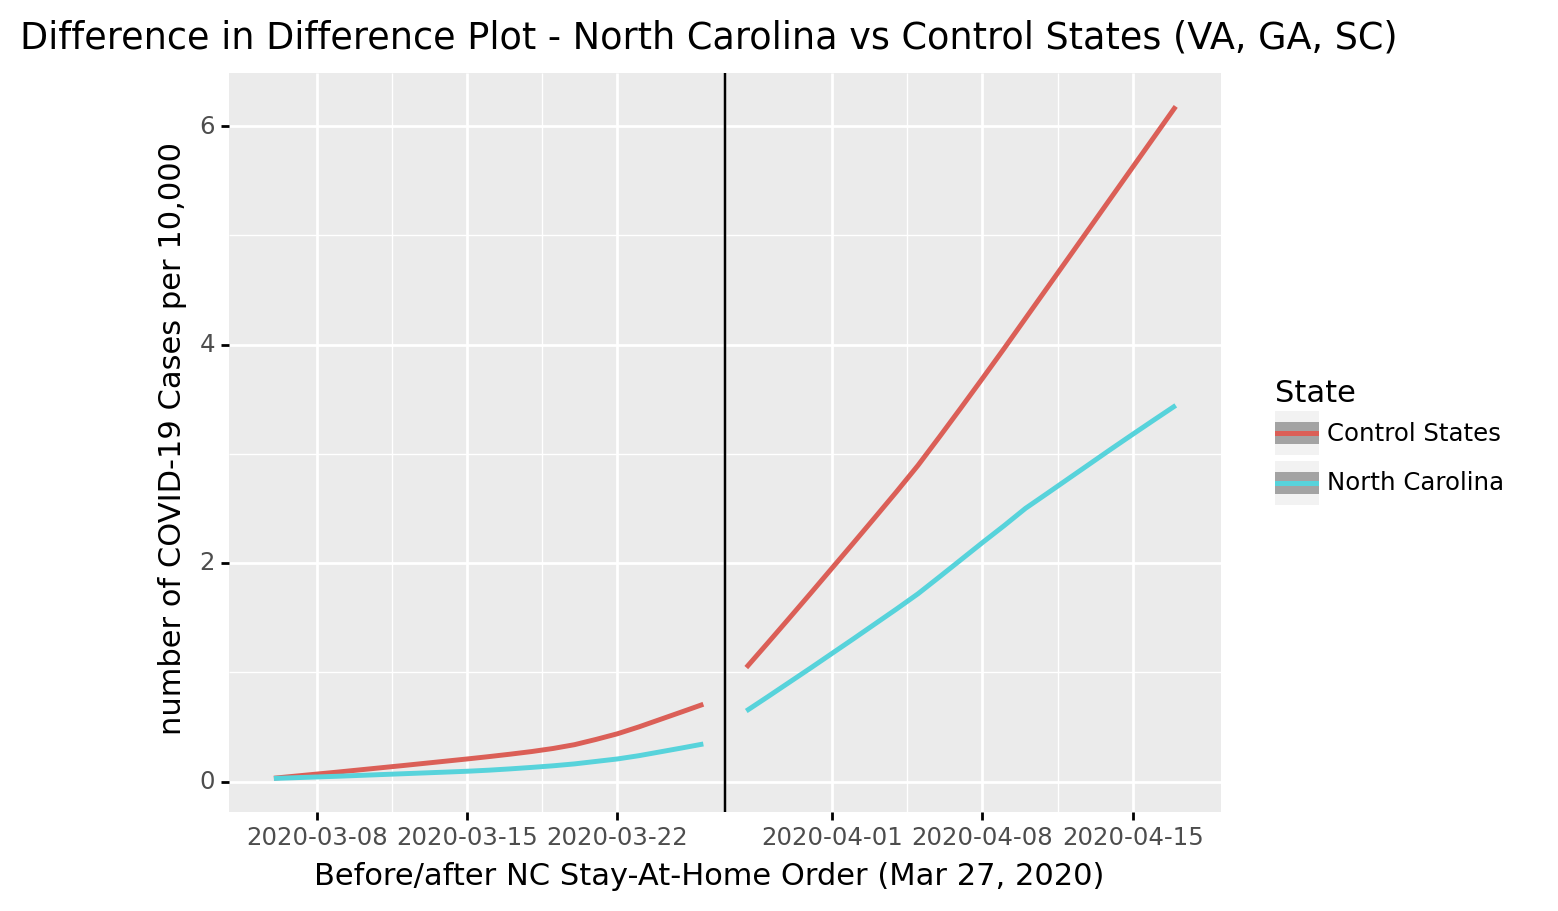

<ggplot: (8778771875801)>

<IPython.core.display.Javascript object>

In [23]:
# diff-in-diff plot - NC vs control counties
(ggplot() +
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') 
    + geom_vline(xintercept = '2020-03-27')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)')
    + ylab(str("number of COVID-19 Cases per 10,000"))
    + labs(title=str("Difference in Difference Plot - North Carolina vs Control States (VA, GA, SC)")))